# Modelling tephra volume removal using OpenStreetMap data - some example use cases

Tephra falls can cause a range of impacts to communities by disrupting, contaminating and damaging buildings and infrastructure systems, as well as posing a potential health hazard (Blong 1984; Wilson et al. 2012). Coordinated clean-up operations minimise the impacts of tephra on social and economic activities (Wilson et al. 2012; Hayes et al. 2015). However, global experience suggests clean-up operations are one of the most challenging aspects of responding to and recovering from tephra falls in urban environments (Hayes et al. 2015). This notebook outlines a process to model tephra clean-up volumes. The notebook is based upon the model presented in Hayes et al. (2017) and Hayes et al. (2019). The underpinning component of the model is a scalable clean-up response framework, which identifies and progressively includes more urban surfaces (e.g., roofs, and roads) requiring clean-up with increasing tephra thickness. Hayes et al. (2017) utilised a detailed asset data inventory of roads, building footprints, and impervious surfaces. However, many locations around the world lack such detailed geospatial datasets, which is a barrier to conducting disaster impact and risk assessments. Hayes et al. (2019) demonstrated that it was possible to utilise open source geospatial data sets for use in tephra clean-up modelling. Therefore, the code uses OpenStreetMap (OSM) data to conduct modelling through the OSMnx package developed by Boeing (2017).

In [1]:
from Cleanup_functions import tephra_cleanup_volume_from_place
from Cleanup_functions import tephra_cleanup_volume_from_point
from Cleanup_functions import tephra_cleanup_volume_from_isopach

## Modelling cleanup volumes for a particular city
If you would like to model the amount of tephra likely requiring removal for a specific location, you can use the tephra_cleanup_volume_from_place function. This function requires 5 arguments to be defined:
1. Place = The name of the city in question. The format of this should be "city, country".
2. min_thickness = The minimum thickness of tephra in mm. 
3. max_thickness = The maximum thickness of tephra in mm.
4. fig = Whether you want a graph produced from the output
5. csv = Whether you want a csv file of the results produced. 

In the below example, we use model a scenario where the city of Rotorua, New Zealand is subjected to 1-5mm of tephra. 

A range of print statements are produced informaing you on what the function is currently doing. We can also see a dataframe is produced that presents summary statistics on the modelling. Finally, a graph is produced of the modelling results. We can see from the results that for a 1-5 mm tephra fall for Rotorua, New Zealand we might expect anywhere between 3000 - 20,000 m^3 of tephra to require removal, but probably around 11,000 m^3. The reason for the uncertainty is due to the range of tephra thickness provided (1-5 mm) and the potential for tephra compaction either before cleanup occurs or during the cleanup process itself.

Initiating tephra clean-up model for  Rotorua, New Zealand
Geospatial folder has been created
Obtaining building footprints from OSM.
Reprojecting buildings to UTM
Calculating footprint area.
Saving building footprints to disk
Total building footprint area is:  2443790.749478361
Building footprints obtained, now obtaining roads from OSM.
reprojecting roads to UTM
saving roads locally
Roads save locally


C:\Users\hayes.jlee\AppData\Local\Continuum\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


Estimating road area
Estimating impervious surface area based on road area
Estimating building footprint area
Initiating clean-up modelling for Rotorua, New Zealand
Maximum tephra thickness for Rotorua, New Zealand is: 5 mm. Minimum  thickness is: 1
Determining the appropriate clean-up threshold to use.
Calculating tephra volume requiring clean-up.
                  0
count  10000.000000
mean   11220.984505
std     4368.491736
min     3377.180170
25%     7454.968407
50%    11160.549694
75%    14900.031456
max    20423.316569
                  Place  10th Percentile  50th Percentile  90th Percentile
0  Rotorua, New Zealand      5239.058348     11160.549694     17160.286503
No csv will be produced because csv=False. If you want a csv, make csv=True


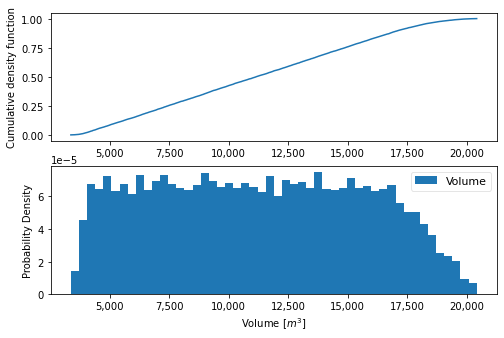

In [2]:
place = "Rotorua, New Zealand"
min_thickness = 1
max_thickness = 5
fig=True
csv=False

Rotorua_cleanup_volume = tephra_cleanup_volume_from_place(place, min_thickness, max_thickness, fig, csv)


## Using the tephra_cleanup_from_point function
Sometimes certain locations within OSM do not have an administrative boundary polygon associated with them. This means that it is not possible to merely enter the name of the city to conduct the modelling. Alternatively, the boundary used in OSM may not be an appropriate boundary for the purposes of the analysis. For example, it may pull the boundary of an entire district, but you may only want to do modelling for the built up area. Using the tephra_cleanup_from_point function allows the user to insert coordinates (lat-long) of a point and a buffer, which will then create a bounding box around the point. This bounding box will then be used to pull the necessary OSM data from. This function works almost exactly the same as the above function, except the user will need to define a point and the buffer distance (in metres). Below we'll use using Rotorua, New Zealand again.

I estimated the centre of the built up area for Rotorua to be at approximately lat=-38.141111, lon=176.235119. The distance from this point to the edge of the built up area is anywhere between 2-4 km from this point. I will choose a buffer distance of 4000 m to ensure that we capture the entire built up area. Any over estimation is likely to have a fairly minor influence in this instance because the land quickly because sparsely developed. We can see that we end up with far lower thicknesses requiring removal compared to using the tephra_cleanup_from_place function. This is because for Rotorua, New Zealand, the tephra_cleanup_from_place function uses the Rotorua District boundary, which extends far futher than the extent of the built up area of Rotorua city.  

C:\Users\hayes.jlee\AppData\Local\Continuum\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Initiating tephra clean-up model for  Rotorua city
Geospatial folder has been created
Obtaining building footprints from OSM.
Reprojecting buildings to UTM
Calculating footprint area.
Saving building footprints to disk
Building footprints obtained, now obtaining roads from OSM.
reprojecting roads to UTM
saving roads locally
Roads save locally
Estimating road area
Estimating impervious surface area based on road area
Estimating building footprint area
Initiating clean-up modelling for Rotorua city
Maximum tephra thickness for Rotorua city is: 5 mm. Minimum  thickness is: 1
Determining the appropriate clean-up threshold to use.
Calculating tephra volume requiring clean-up.


C:\Users\hayes.jlee\AppData\Local\Continuum\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


                  0
count  10000.000000
mean    2093.119552
std      814.327935
min      635.325145
25%     1393.121566
50%     2080.236899
75%     2772.722210
max     3832.263485
          Place  10th Percentile  50th Percentile  90th Percentile
0  Rotorua city       983.112443      2080.236899      3215.490299
No csv will be produced because csv=False. If you want a csv, make csv=True


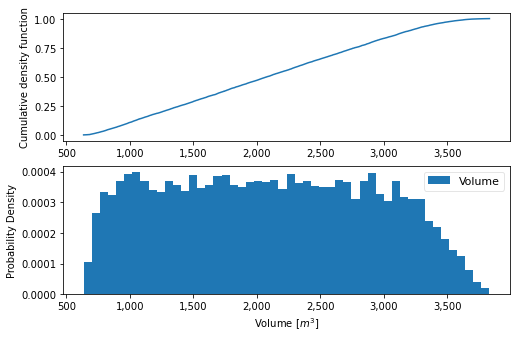

In [3]:
place = "Rotorua city"
point = (-38.141111, 176.235119)
buffer = 4000
min_thickness = 1
max_thickness = 5
fig=True
csv=False

Rotorua_cleanup_volume_from_point = tephra_cleanup_volume_from_point(point, 
                                                                     buffer, 
                                                                     place, 
                                                                     min_thickness, 
                                                                     max_thickness, 
                                                                     fig, 
                                                                     csv
                                                                    )


## What if you want to use a tephra isopach to estimate volume removal?

Sometimes you might want to estmiate the total amount of tephra requiring removal for a particular eruption scenario, where you use an isopach map. Instead of modelling for an individual location, like done in the examples above, you instead want to get an aggregated volume for many locations. Using the tephra_cleanup_volume_from_isopach will achieve this.

This function uses a polygon of the tephra isopach. The polygon should be in WG84 and should contain two columns called: "min_thick" and "max_thick". These columns should contain a float or integer value of the minimum and maximum thickness for each isopach band. Here we will use a pretend isopach from a Ruapehu eruption. This is entirely fictional and only inteded to illustrate how the function works. We need to give a name for the isopach, here we will use a descriptor for the scenario being run. 

Here, we can see that the volume requiring removal across the entire isopach is significantly larger than either of the above two options. This is because it is factoring in a much larger area and differing tephra thicknesses across the isopach. 

C:\Users\hayes.jlee\AppData\Local\Continuum\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Geospatial folder has been created
Obtaining building footprints from OSM.
Reprojecting buildings to UTM
Calculating footprint area.
Saving building footprints to disk
Building footprints obtained, now obtaining roads from OSM.
reprojecting roads to UTM
saving roads locally
Roads saved locally


C:\Users\hayes.jlee\AppData\Local\Continuum\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


Estimating road area
Estimating impervious surface area based on road area
Estimating building footprint area
Initiating clean-up modelling for PretendRuapehuEruption
Determining the appropriate clean-up threshold to use.
Calculating tephra volume requiring clean-up.
                   0
count   10000.000000
mean   258868.279327
std    115524.334218
min     58524.360432
25%    159847.452573
50%    258478.731829
75%    357038.646727
max    463155.558212
                    Place  10th Percentile  50th Percentile  90th Percentile
0  PretendRuapehuEruption     98387.176118    258478.731829    419615.697311
No csv will be produced because csv=False. If you want a csv, make csv=True


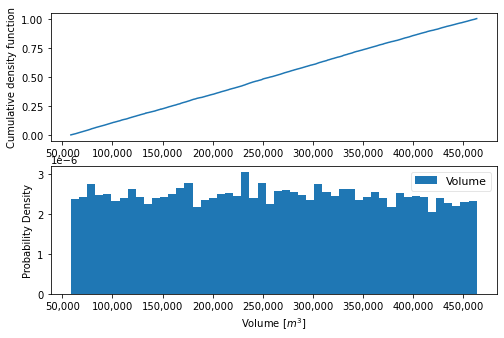

In [4]:
import geopandas as gpd
isopach = gpd.read_file("Geospatial_data/Pretend_scenario/Pretend_Ruapehu_Eruption.shp")
name = "PretendRuapehuEruption"
test = tephra_cleanup_volume_from_isopach(name, isopach, fig, csv)

## References

Blong R (1984) Volcanic hazards: A sourcebook on the effects of eruptions

Boeing G (2017) OSMnx: New methods for acquiring, constructing, analyzing, and visualizing complex street networks. Computers, Environment and Urban Systems 65:126-139. https://doi.org/10.1016/j.compenvurbsys.2017.05.004

Hayes JL, Wilson TM, Magill C (2015) Tephra fall clean-up in urban environments. Journal of Volcanology and Geothermal Research. 304:359-377. https://doi.org/10.1016/j.jvolgeores.2015.09.014

Hayes J, Wilson TM, Deligne NI, Cole J, Hughes M (2017) A model to assess tephra clean-up requirements in urban environments. Journal of Applied Volcanology. 6(1). https://doi.org/10.1186/s13617-016-0052-3

Hayes JL, Wilson TM, Deligne NI, Stewart C, Villarosa G, Salgado P, Beigt D, Outes V, Deligne NI, Leonard GS (2019) Tephra clean-up after the 2015 eruption of Calbuco volcano, Chile: a quantitative geospatial assessment in four communities. Journal of Applied Volcanology. 8(7). https://appliedvolc.biomedcentral.com/track/pdf/10.1186/s13617-019-0087-3

Wilson TM, Stewart C, Sword-Daniels V, Leonard GS, Johnston DM, Cole JW, Wardman J, Wilson G, Barnard ST (2012) Volcanic ash impacts on critical infrastructure. Phys Chem Earth 45–46:5–23. https://doi.org/doi:10.1016/j.pce.2011.06.006.